# DASK and RAPIDS

- Documentation: https://docs.dask.org/en/stable/

## Installation

In [ ]:
# This cell would be used if you are only installing DASK (but not rapids)
# ! pip install dask
# ! pip install dask_cuda

In [1]:
! git clone https://github.com/rapidsai/rapidsai-csp-utils.git
! pip3 install --upgrade pip
! python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (490/490), 136.70 KiB | 4.71 MiB/s, done.
Resolving deltas: 100% (251/251), done.
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Linux commands
! cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [6]:
! uname -a

Linux 96779ce62cb3 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


## Import libraries

In [2]:
import cudf, cuml
import dask, dask_cudf
print('Dask: ', dask.__version__)
print('Dask cuDF:', dask_cudf.__version__)

Dask:  2024.1.1
Dask cuDF: 24.04.01


## Useful commands

In [10]:
# GPU Info:
! nvidia-smi

Mon Aug 19 16:38:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# CPU Info:
! lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.00GHz
    CPU family:           6
    Model:                85
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             3
    BogoMIPS:             4000.34
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [12]:
# To check the allocated memory to you:
! free -h --si | awk  '/Mem:/{print $2}'

12G


## Creating a local cluster


In [3]:
from dask.distributed import Client, LocalCluster, wait, progress

In [4]:
from dask_cuda import LocalCUDACluster

* Dask-CUDA: https://docs.rapids.ai/api/dask-cuda/stable/quickstart.html
* Deploy Dask clusters in the cloud: https://docs.dask.org/en/stable/deploying.html#cloud
* Dask documentation: https://docs.dask.org/en/stable/deploying.html#distributed-computing


In [15]:
cluster = LocalCUDACluster(threads_per_worker=1) # Number of available GPU's or number of CPU cores
client = Client(cluster)
client

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:43771
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45733'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:41395', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:41395
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35462
INFO:distributed.scheduler:Receive client connection: Client-980f58bf-5e49-11ef-8448-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35468


Connection method: Cluster object,Cluster type: dask_cuda.LocalCUDACluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 1,Total memory: 12.67 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43771,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 1
Started: Just now,Total memory: 12.67 GiB
Comm: tcp://127.0.0.1:41395,Total threads: 1
Dashboard: http://127.0.0.1:35551/status,Memory: 12.67 GiB
Nanny: tcp://127.0.0.1:45733,


Workers have two functions:
1. Calculate tasks as indicated by the scheduler
2. Store and provide computed results to other workers or clients

* Each worker contains a ThreadPool, which it uses to evaluate tasks as requested by the scheduler. The worker stores the results of these tasks locally and provides them to other workers or clients on demand. If the worker is asked to evaluate a task for which it does not have all the necessary data, it will contact its peers to gather the necessary dependencies.

* Each worker sends calculations to a thread in concurrent.futures.ThreadPoolExecutor to perform the calculation. These calculations occur in the same process as the Worker communication server so that they can efficiently access and share data with each other. For data locality purposes, all threads within a worker are considered the same worker.

More about workers: https://distributed.dask.org/en/latest/worker.html


## Arrays in distributed GPUs

- Singular value decomposition: https://en.wikipedia.org/wiki/Singular_value_decomposition



In [5]:
import dask.array as da # DASK numpy array
import cupy             # CUDA numpy array (cupy.ndarray)

In [17]:
rs = da.random.RandomState(RandomState=cupy.random.RandomState, seed = 42)
# Divide the array into partitions/chunks for parallel processing
x = rs.random((100000, 1000), chunks = (10000, 1000))
x = x.persist() # Copy all of the data into memory

In [18]:
x

dask.array<random_sample, shape=(100000, 1000), dtype=float64, chunksize=(10000, 1000), chunktype=cupy.ndarray>

In [19]:
u, s, v = da.linalg.svd(x)

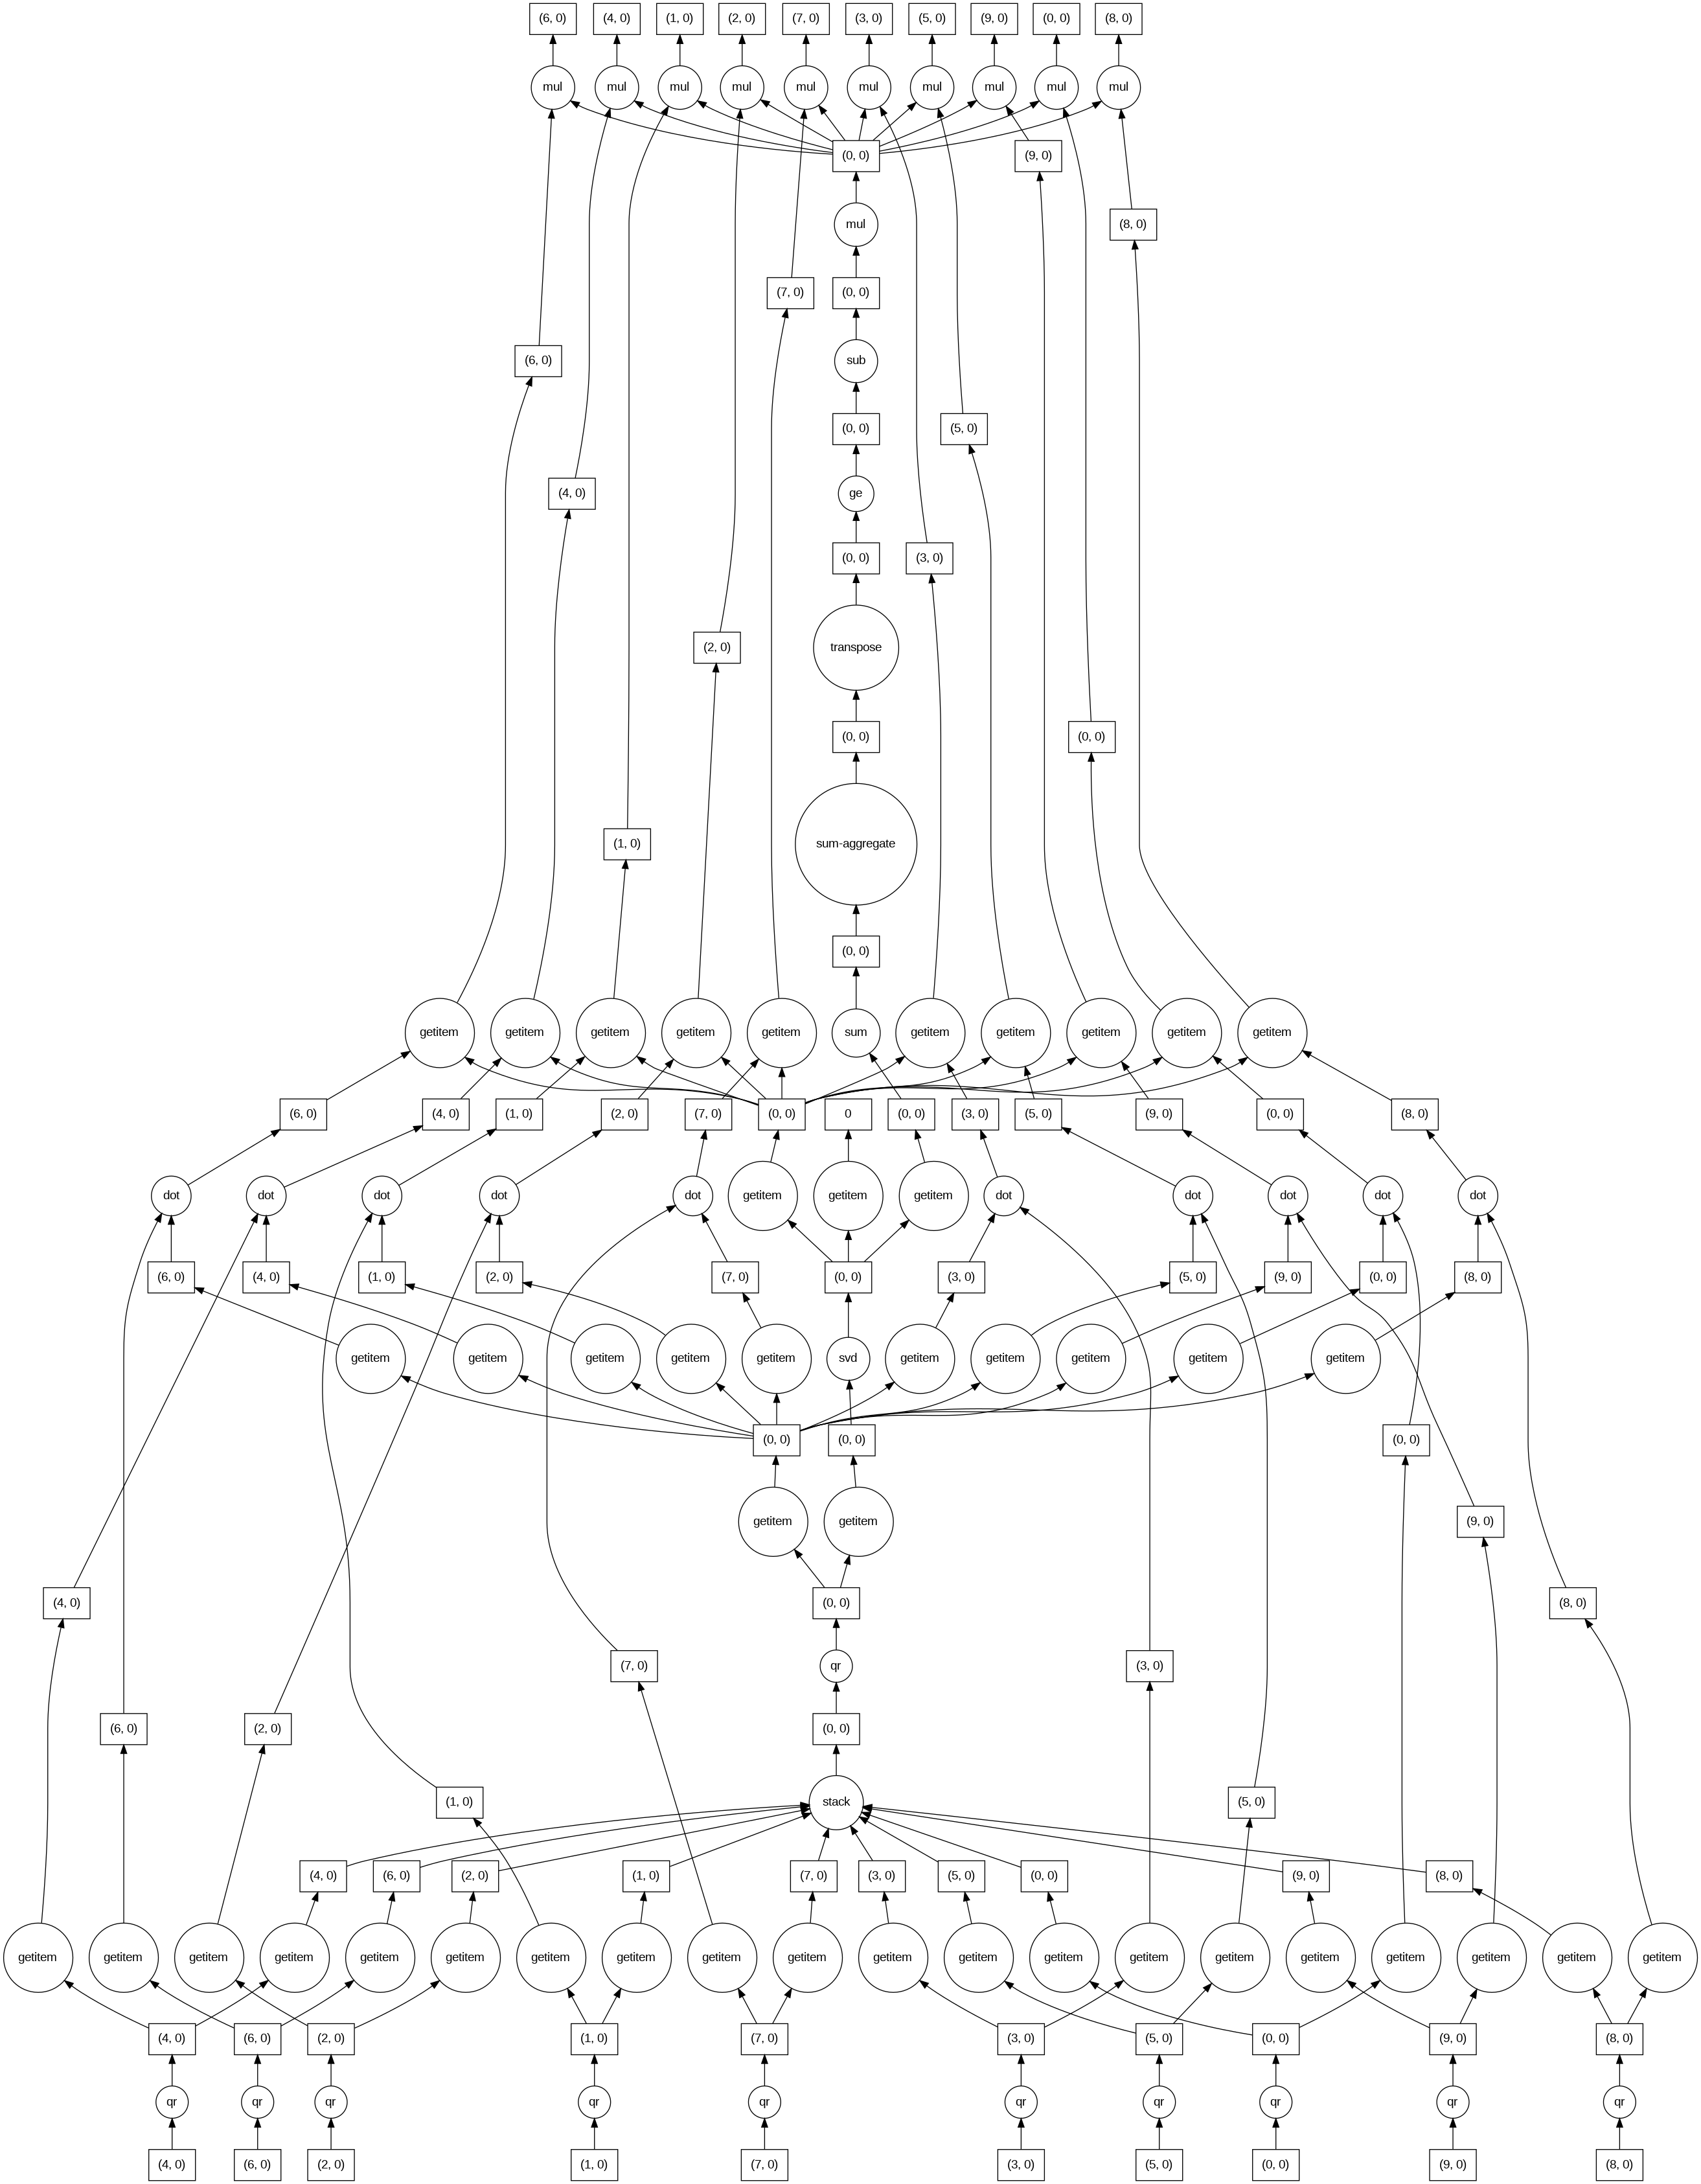

In [20]:
u.visualize()

In [23]:
u, s, v = dask.persist(u, s, v) # Move all of the data into memory

In [24]:
u

dask.array<mul, shape=(100000, 1000), dtype=float64, chunksize=(10000, 1000), chunktype=cupy.ndarray>

In [25]:
s

dask.array<getitem-63c95e5b466bf9683b31967bb391c202, shape=(1000,), dtype=float64, chunksize=(1000,), chunktype=cupy.ndarray>

In [26]:
v

dask.array<mul, shape=(1000, 1000), dtype=float64, chunksize=(1000, 1000), chunktype=cupy.ndarray>

# Dask and cuDF

## Creating objects

In [27]:
s = cudf.Series([1, 2, None, 3, 4])
s

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [28]:
s.head()

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [29]:
ds = dask_cudf.from_cudf(s, npartitions=2) # Partitions/chunks

In [30]:
ds.head()

0       1
1       2
2    <NA>
dtype: int64

In [32]:
ds.compute().head(10) # Costly operation

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [33]:
df = cudf.DataFrame(
    {'a': list(range(10)),
     'b': list(reversed(range(10))),
     'c': list(range(10))})
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [37]:
ddf = dask_cudf.from_cudf(df, npartitions=2)
ddf.head(6)

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4


In [35]:
ddf.compute()

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


## Ordering


In [39]:
type(df),

(cudf.core.dataframe.DataFrame,)

In [40]:
df.sort_values(by = "b")

,a,b,c
9,9,0,9
8,8,1,8
7,7,2,7
6,6,3,6
5,5,4,5
4,4,5,4
3,3,6,3
2,2,7,2
1,1,8,1
0,0,9,0


In [41]:
type(ddf),

(dask_cudf.core.DataFrame,)

In [42]:
ddf.sort_values(by = "b").head(6)

,a,b,c
9,9,0,9
8,8,1,8
7,7,2,7
6,6,3,6


In [43]:
ddf.sort_values(by = "b").compute()

,a,b,c
9,9,0,9
8,8,1,8
7,7,2,7
6,6,3,6
5,5,4,5
4,4,5,4
3,3,6,3
2,2,7,2
1,1,8,1
0,0,9,0


## Selection


In [44]:
ddf['a'].head()

0    0
1    1
2    2
3    3
4    4
Name: a, dtype: int64

In [45]:
ddf.loc[2:4, ['a', 'b']].head()

,a,b
2,2,7
3,3,6
4,4,5


## Conditions


In [46]:
ddf[ddf["b"] > 7].head(n = 3)

,a,b,c
0,0,9,0
1,1,8,1


In [47]:
ddf.query("b == 9").compute()

,a,b,c
0,0,9,0


## Writing and reading

In [48]:
ddf.compute().to_csv('example.csv', index = False)

In [49]:
df = cudf.read_csv('example.csv')
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


# Dask and cuML

In [6]:
from sklearn.metrics import accuracy_score
from sklearn import model_selection, datasets

from cuml.dask.common import utils as dask_utils
from dask.distributed import Client, wait
from dask_cuda import LocalCUDACluster
import dask_cudf

from cuml.dask.ensemble import RandomForestClassifier as RF_cumlDask
from sklearn.ensemble import RandomForestClassifier as RF_skl

import pandas as pd
import numpy as np

## Creating a local cluster

In [7]:
cluster = LocalCUDACluster(threads_per_worker=1)
c = Client(cluster)

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34423
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45769'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42627', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42627
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58892
INFO:distributed.scheduler:Receive client connection: Client-e15ccb69-5e4c-11ef-814c-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:58902


In [8]:
workers = c.has_what().keys()

In [9]:
# The list of workers will contain multiple values when there are multiple CPU's/GPU's
workers

dict_keys(['tcp://127.0.0.1:42627'])

In [10]:
n_workers = len(workers)

In [11]:
n_workers

1

In [12]:
# Run N=8 parallel tasks
n_streams = 8

## Parameters


In [13]:
# Dataset size
train_size = 100000
test_size = 1000
n_samples = train_size + test_size
n_features = 20

In [14]:
# Random Forest parameters
max_depth = 12
n_bins = 16
n_trees = 1000
# https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

## Generate data in the host


In [15]:
20 / 3

6.666666666666667

In [16]:
# Create a random classification dataset (using sklearn)
X, y = datasets.make_classification(n_samples = n_samples,    # rows
                                    n_features = n_features,  # columns
                                    random_state = 42,
                                    n_classes = 5,                       # features should have N classes
                                    n_informative = int(n_features / 3)  # number of features that have relevance
                                    )

In [17]:
X   # numpy array

array([[-1.90425788, -0.50971835,  0.55500117, ...,  0.55369778,
        -0.92862572,  0.57971938],
       [-0.32275104, -0.19441714, -0.06472511, ...,  1.01245725,
         0.05906818, -0.66059884],
       [-0.40028766, -1.41108068, -0.54109213, ...,  1.00269633,
        -3.14986774,  0.57652495],
       ...,
       [-4.54482637,  0.36280994, -0.21436938, ...,  0.64515948,
         0.32288383, -1.08699698],
       [-0.72672053,  0.19066969, -2.34153864, ..., -0.02446487,
         0.56154352,  0.36693812],
       [ 0.83417936,  0.36632402, -0.74353803, ...,  2.51079835,
        -0.92390147, -0.65689758]])

In [18]:
y

array([2, 0, 0, ..., 4, 4, 0])

In [19]:
X = X.astype(np.float32)
y = y.astype(np.int32)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = test_size)

In [20]:
X_train.shape, y_train.shape

((100000, 20), (100000,))

In [21]:
X_test.shape, y_test.shape

((1000, 20), (1000,))

In [22]:
type(X_train)

numpy.ndarray

## Distribute the data


In [23]:
n_workers

1

In [24]:
n_partitions = n_workers

def distribute (X, y):

  X_cudf = cudf.DataFrame.from_pandas(pd.DataFrame(X))
  # X_cudf = cudf.DataFrame(X)  # Can this use a numpy array ?????
  y_cudf = cudf.Series(y)

  X_dask = dask_cudf.from_cudf(X_cudf, npartitions=n_partitions)
  y_dask = dask_cudf.from_cudf(y_cudf, npartitions=n_partitions)

  X_dask, y_dask = dask_utils.persist_across_workers(c, [X_dask, y_dask], workers=workers)

  return X_dask, y_dask

In [25]:
X_train_dask, y_train_dask = distribute(X_train, y_train)
X_test_dask, y_test_dask = distribute(X_test, y_test)

In [26]:
type(X_train_dask),

(dask_cudf.core.DataFrame,)

In [27]:
X_train_dask.shape

(Delayed('int-e4358cdb-cb97-4df6-97a5-8760662e4e17'), 20)

## CPU using scikit-learn

In [75]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
skl_model = RF_skl(max_depth=max_depth, n_estimators=n_trees, n_jobs=-1, verbose=True)
skl_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.8min


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
! lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clf
                         lush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_
                         good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fm
                         a cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hyp
                         ervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd i

## GPU using cuML + Dask


In [28]:
type(X_train_dask), type(y_train_dask)

(dask_cudf.core.DataFrame, dask_cudf.core.Series)

In [29]:
n_streams

8

In [30]:
cuml_model = RF_cumlDask(max_depth=max_depth, n_estimators=n_trees, n_bins=n_bins, n_streams=n_streams)
cuml_model.fit(X_train_dask, y_train_dask)
wait(cuml_model.rfs) # wait for the asynch tasks to complete

DoneAndNotDoneFutures(done={<Future: finished, type: cuml.ensemble.randomforestclassifier.RandomForestClassifier, key: _construct_rf-21153888-e396-43f4-a5f4-641c0b0aa3a2>}, not_done=set())

## Predictions

In [31]:
cuml_model.predict(X_test_dask).compute() # Gets data for all GPU's/CPU's

/usr/local/lib/python3.10/dist-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 366.09 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 365.94 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


0      2.0
1      2.0
2      0.0
3      4.0
4      2.0
      ... 
995    2.0
996    3.0
997    1.0
998    3.0
999    3.0
Length: 1000, dtype: float32

In [32]:
# Compare the results (skipped the CPU section as Colab kicked us off)

# skl_y_pred = skl_model.predict(X_test)
cuml_y_pred = cuml_model.predict(X_test_dask).compute().to_numpy()

# skl_accuracy = accuracy_score(y_test, skl_y_pred)
cuml_accuracy = accuracy_score(y_test, cuml_y_pred)

# print("SKLearn: {}".format(skl_accuracy))
print("CuML: {}".format(cuml_accuracy))

/usr/local/lib/python3.10/dist-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 366.09 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/distributed/client.py:3162: UserWarning: Sending large graph of size 365.94 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


CuML: 0.775


## Saving the model

In [ ]:
import pickle
pickle.dump(skl_model, open("model_RF.pkl", "wb"))

For distributed models and within the context of Dask (which may be multi-GPU) there may be some additional details if you need to load the model on a machine where there are not multiple GPUs, or not even GPUs. In this case, check this documentation page to see if there are any additional parameters needed https://docs.rapids.ai/api/cuml/nightly/pickling_cuml_models/ (may be updated in the future)

